Multiple Linear Regression
==========================
"f(x) = b + w1X1 + w2X2 + ... + wnXn

w = [w1, w2, ..., wn]
b is a number
X = [X1, X2, ..., Xn]
=> f(x) = b + w.X, where w and X are vectors and . represents dot product

Prepare Data

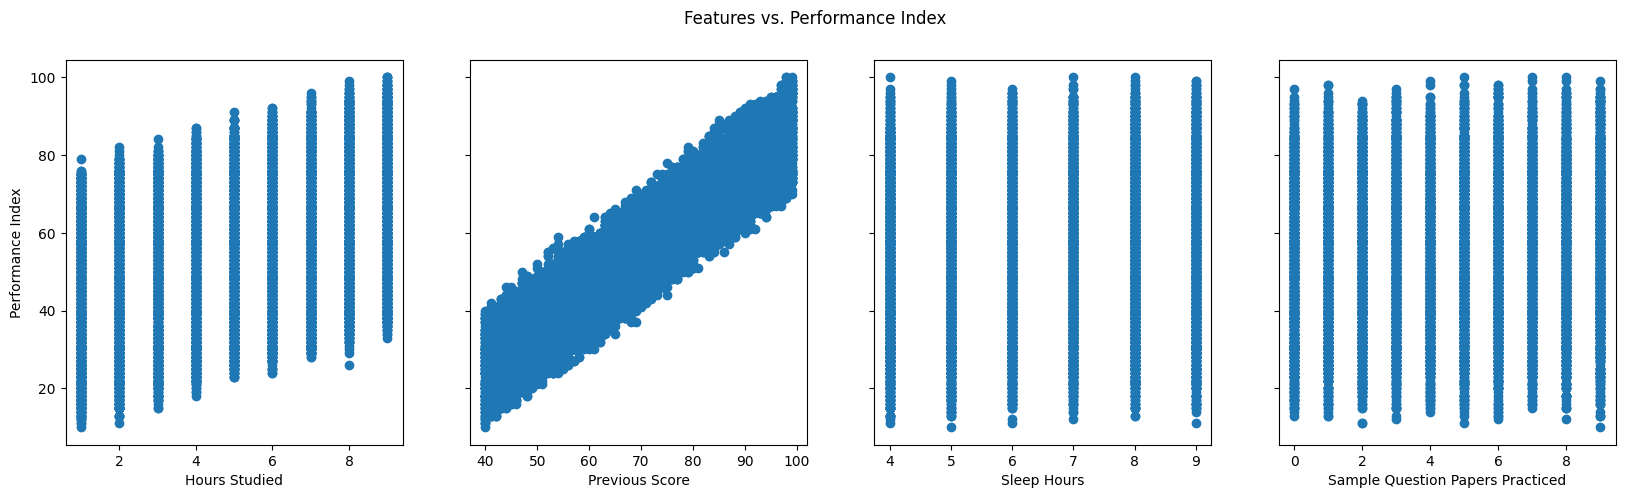

In [10]:
import copy
import time

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# load csv data
data = np.genfromtxt('../Student_Performance.csv', delimiter=',', skip_header=1)

# drop rows with missing values
data = data[~np.isnan(data).any(axis=1)]

# split data into X and y
X = data[:, :-1]
y = data[:, -1]

# split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_labels = ['Hours Studied', 'Previous Score', 'Sleep Hours', 'Sample Question Papers Practiced']
# plot each feature against y
fig, ax = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:, i], y_train)
    ax[i].set_xlabel(X_train_labels[i])
ax[0].set_ylabel('Performance Index')
fig.suptitle('Features vs. Performance Index')
plt.show()

Cost Function
=============
J(w, b) = 1/2m * sum((f(x) - y)^2)

In [7]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        cost = cost + (f_wb_i - y[i]) ** 2
    cost = cost / (2 * m)
    return cost

Gradient Descent
================
w = w - alpha * dJ(w, b)/dw
b = b - alpha * dJ(w, b)/db

where dJ(w, b)/dw = 1/m * sum((f(x) - y) * x)
and dJ(w, b)/db = 1/m * sum(f(x) - y)

In [8]:
def compute_gradient(X, y, w, b):
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        err = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i, j]
        dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw


def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  # avoid modifying global w within function
    b = b_in

    for i in range(num_iters):
        dj_db, dj_dw = gradient_function(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J at each iteration
        if i < 100000:  # prevent resource exhaustion 
            J_history.append(cost_function(X, y, w, b))

    return w, b, J_history

Test with Test Data
=======

In [ ]:
initial_w = np.zeros(X_train.shape[1])
initial_b = 0

# play around with iterations and alpha
iterations = 500
alpha = 0.0001

start = time.time()
w, b, J_history = gradient_descent(X_train, y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha,
                                   iterations)
end = time.time()

print(f'w: {w}')
print(f'b: {b}')
print(f'Time taken: {end - start} seconds')

y_pred = np.dot(X_test, w) + b

# plot y_test vs y_pred and x=y line
plt.scatter(y_test, y_pred)
plt.plot([0, 100], [0, 100], '--k')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

# calculate cost on test data
cost = compute_cost(X_test, y_test, w, b)
print(f'Cost on test data: {cost}')

P.S: some libraries use the "normal equation" to solve for w and b. The normal equation is a closed-form solution that directly computes the parameters that minimize the cost function.

In [ ]:
# plot cost vs. iterations for last 50 iterations
plt.plot(J_history[-50:])
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

Note that the cost is still decreasing. We will explore more on this later.

In [ ]:
# plot contour plot of cost function, for the first two features
w1_vals = np.linspace(-10, 10, 100)
w2_vals = np.linspace(-10, 10, 100)

J_vals = np.zeros((len(w1_vals), len(w2_vals)))
for i, w1 in enumerate(w1_vals):
    for j, w2 in enumerate(w2_vals):
        w = np.array([w1, w2])
        J_vals[i, j] = compute_cost(X_train[:, :2], y_train, w, b)
        
plt.contour(w1_vals, w2_vals, J_vals.T, levels=np.logspace(-2, 3, 20))
plt.xlabel('w1')
plt.ylabel('w2')
plt.title('Contour plot of cost function')
plt.show()

Notice how narrow the contour plot is. This is because the features have different ranges.
We will address this in the next section.

Feature Scaling
===============
When the possible values of features differ by orders of magnitude (e.g., one feature ranges from 0 to 1 and another ranges from 1 to 1000), it is likely that the 'w' values will also differ by orders of magnitude.
The contour plot of the cost function will be narrow on the side of the feature with the larger range and wider on the side of the feature with the smaller range.
In this case, the algorithm will take longer to converge.

To address this, we can normalize the features to have similar ranges.
Then, the contour plot of the cost function will be more symmetric and the algorithm will converge faster.

Normalization approaches:
1. divide by maximum: x = x / max  OR  x = (x - min) / (max - min)
2. mean normalization: x = (x - mean) / (max - min)     ----> -1 <= x <= 1
3. z-score normalization: x = (x - mean) / std      ----> mean = 0, std = 1

mean = 1/m * sum(x)
std = sqrt(1/m * sum(x - mean)^2)

As a rule of thumb, aim for -1 <= x <= 1

Note: when in doubt, rescale the features.

In [21]:
def z_score_normalization(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

In [ ]:
# perform scaling
X_train_norm, mu, sigma = z_score_normalization(X_train)

# plot the first and second features
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(X_train[:, 1], X_train[:, 0])
ax[0].set_xlabel(X_train_labels[1]); ax[0].set_ylabel(X_train_labels[0])
ax[0].set_title('un-normalized data')
ax[0].axis('equal')

ax[1].scatter(X_train_norm[:, 1], X_train_norm[:, 0])
ax[1].set_xlabel(X_train_labels[1]); ax[1].set_ylabel(X_train_labels[0])
ax[1].set_title('z-score normalization')
ax[1].axis('equal')

plt.show()

In [ ]:
print(f'mu: {mu}')
print(f'sigma: {sigma}')

In [ ]:
# re-run gradient descent with normalized features
initial_w = np.zeros(X_train_norm.shape[1])
initial_b = 0

iterations = 500
alpha = 0.1     # alpha = 0.1 is a good start for normalized features

start = time.time()
w, b, J_history = gradient_descent(X_train_norm, y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha,
                                   iterations)
end = time.time()

print(f'w: {w}')
print(f'b: {b}')
print(f'Time taken: {end - start} seconds')

# TODO: why is it taking so long?

In [ ]:
# predict on test data
X_test_norm = (X_test - mu) / sigma
y_pred = np.dot(X_test_norm, w) + b

# plot y_test vs y_pred and x=y line
plt.scatter(y_test, y_pred)
plt.plot([0, 100], [0, 100], '--k')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

Notice that the predictions are closer to the line x=y!

In [ ]:
# plot predictions and targets vs. features
fig, ax = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i], y_train, label='Training data')
    ax[i].set_xlabel(X_train_labels[i])
    # predictions
    ax[i].scatter(X_test[:,i], y_pred, label='Predictions')
ax[0].set_ylabel('Performance Index')
ax[0].legend()
fig.suptitle('target vs. predictions')
plt.show()

In [ ]:
# Plot cost function in the last 50 iterations
plt.plot(J_history[-50:])
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

Notice that the cost is much less than before. This is because the features are normalized.

In [ ]:
# plot contour plot of cost function, for the first two features
# we can see that the contour plot is more symmetric
w1_vals = np.linspace(-10, 10, 100)
w2_vals = np.linspace(-10, 10, 100)

J_vals = np.zeros((len(w1_vals), len(w2_vals)))
for i, w1 in enumerate(w1_vals):
    for j, w2 in enumerate(w2_vals):
        w = np.array([w1, w2])
        J_vals[i, j] = compute_cost(X_train_norm[:, :2], y_train, w, b)
        
plt.contour(w1_vals, w2_vals, J_vals.T, levels=np.logspace(-2, 3, 20))
plt.xlabel('w1')
plt.ylabel('w2')
plt.title('Contour plot of cost function')
plt.show()

Now the plot is more symmetric, and the algorithm converges faster.

Choosing alpha and checking convergence
=======================================
We can use the cost function to determine if the algorithm has converged.
The cost function - or learning curve - should decrease with each iteration.
If the cost function is not decreasing, we may need to adjust the learning rate alpha.

Another way to check for convergence is to set a threshold for the difference in cost between iterations.
If the difference is less than the threshold, the algorithm has converged.

You can start with an initial value of alpha, and then triple it each time.
By plotting the cost function, you can choose the largest possible alpha that still converges.

Feature Engineering
===================
Feature engineering is the process of creating new features from existing features.
This can help improve the performance of the model.

For example, we might have a dataset of frontage and depth of houses and want to predict the price.
We can create a new feature called area by multiplying frontage and depth.

Polynomial Regression
=====================
The combination of feature engineering and multiple linear regression is called polynomial regression.
The relationship between the features and the target is not always linear.
We can add polynomial terms to the features to capture non-linear relationships.

f(x) = b + w1X1 + w2X2 + w3X1^2 + w4X2^2 + w5X1X2 + ...
It is worth mentioning that feature scaling is even more important in polynomial regression.

You may also use the square root of features, log of features, etc.

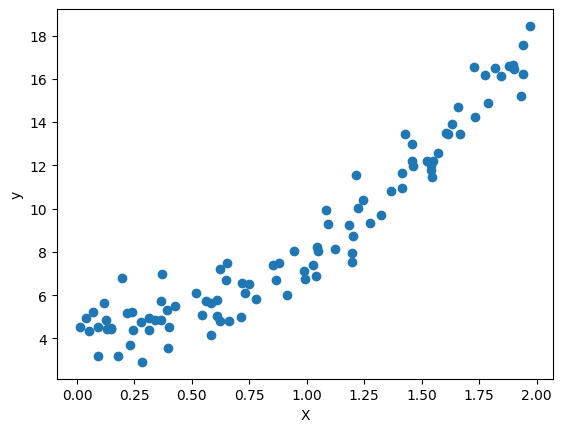

In [17]:
import numpy as np
import matplotlib.pyplot as plt


# generate random data, in the form of a parabola
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + X + 3 * X**2 + np.random.randn(100, 1)

plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

/tmp/ipykernel_15794/805804094.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dj_dw[j] = dj_dw[j] + err * X[i, j]


w: [6.61061234]
b: [2.42713447]


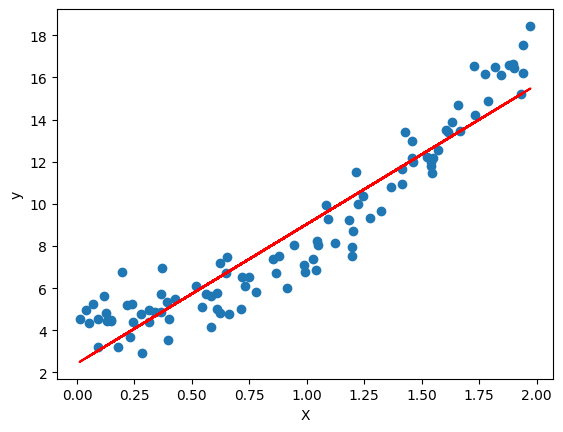

In [18]:
# try the gradient descent algorithm
w = [0]
b = 0

w, b, J_history = gradient_descent(X, y, w, b, compute_cost, compute_gradient, 0.1, 1000)

print(f'w: {w}')
print(f'b: {b}')
# TODO: do sth about the warning.
# plot the curve over the data
plt.scatter(X, y)
plt.plot(X, w*X + b, color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

We can see that the line is not fitting the data well.

/tmp/ipykernel_15794/805804094.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dj_dw[j] = dj_dw[j] + err * X[i, j]


w: [0.19131955 3.3144391 ]
b: [4.36804183]


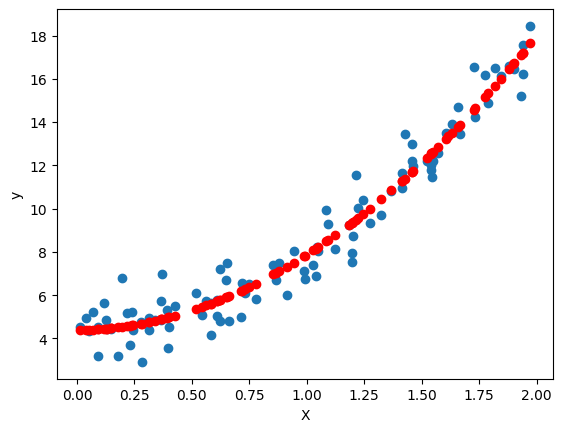

In [19]:
# let's try polynomial regression and feature engineering
w = [0, 0]
b = 0

X_poly = np.c_[X, X**2]
w, b, J_history = gradient_descent(X_poly, y, w, b, compute_cost, compute_gradient, 0.1, 1000)

print(f'w: {w}')
print(f'b: {b}')

# plot the curve over the data
plt.scatter(X, y)
plt.scatter(X, w[0]*X + w[1]*X**2 + b, color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

We can see that the value for w1 is larger than w0,
 meaning that gradient descent is picking the 'correct' feature by emphasizing its parameter.

Thus, the polynomial feature was chosen based on how well it fits the data.

/tmp/ipykernel_15794/805804094.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dj_dw[j] = dj_dw[j] + err * X[i, j]


w: [1.42297    2.62358142]
b: [8.64312656]


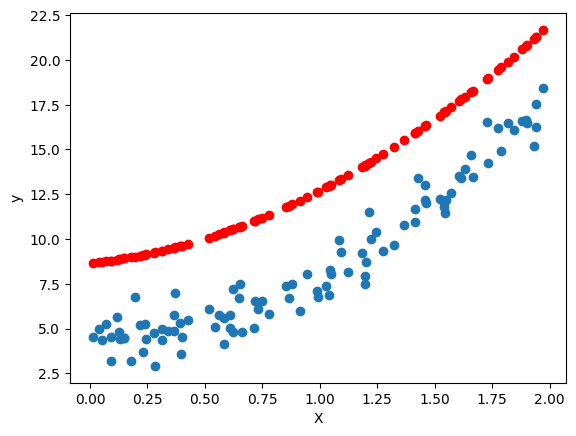

In [27]:
# let's not forget to normalize the features
X_poly_norm, mu, sigma = z_score_normalization(X_poly)

w = [0, 0]
b = 0

w, b, J_history = gradient_descent(X_poly_norm, y, w, b, compute_cost, compute_gradient, 0.01, 1000)

print(f'w: {w}')
print(f'b: {b}')

# plot the curve over the data
# TODO: wtf
plt.scatter(X, y)
plt.scatter(X, w[0]*X + w[1]*X**2 + b, color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

We can use linear regression to model even more complex functions.

/tmp/ipykernel_15794/4030468657.py:6: RuntimeWarning: overflow encountered in scalar add
  cost = cost + (f_wb_i - y[i]) ** 2
/tmp/ipykernel_15794/4030468657.py:6: RuntimeWarning: overflow encountered in scalar power
  cost = cost + (f_wb_i - y[i]) ** 2
/tmp/ipykernel_15794/805804094.py:9: RuntimeWarning: overflow encountered in scalar add
  dj_dw[j] = dj_dw[j] + err * X[i, j]
/tmp/ipykernel_15794/805804094.py:9: RuntimeWarning: overflow encountered in scalar multiply
  dj_dw[j] = dj_dw[j] + err * X[i, j]


ValueError: x and y must be the same size

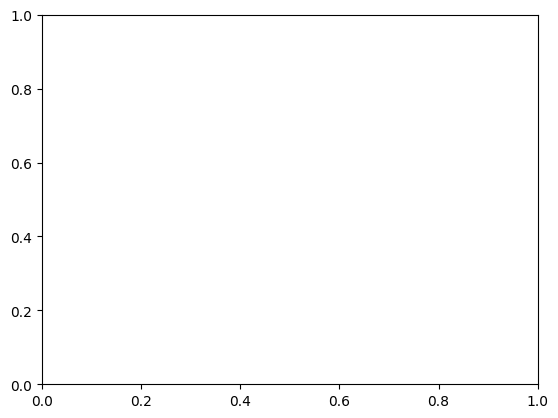

In [29]:
# sin function
X = np.linspace(0, 10, 100)
y = np.sin(X) + np.random.randn(100) / 10

X = np.c_[X, X**2, X**3, X**4, X**5, X**6, X**7, X**8, X**9, X**10]

w, b, J_history = gradient_descent(X, y, np.zeros(10), 0, compute_cost, compute_gradient, 0.1, 1000)

# TODO: wtf
plt.scatter(X, y)
plt.scatter(X, np.dot(X, w) + b, color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.show()